<a href="https://colab.research.google.com/github/Kuriajm/Week_9_Core_IP-/blob/main/Moringa_School_Data_Science_Core_IP_Wk_9_Naive_Bayers_Mk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Emails classifier using Naive Bayer**

##**1. Business understanding**

**1.1 Define the question**

Create a model that classifies an email as a spam or not.

   **Tasks** 

1. Randomly partition each dataset into two parts i.e 80 - 20  sets.
2. For dataset 2, perform classification of the testing set samples using the Naive Bayes Classifier.
3. Compute the accuracy (percentage of correct classification).
4. Report the confusion matrix of each classifier.
5. Repeat step 2 to step 4 twice, each time splitting the datasets differently i.e. 70-30, 60-40, then note the outcomes of your modeling.
6. Suggest and apply at least one of the optimization techniques that you learned earlier this week.
7. Provide further recommendations to improve both classifiers.


**1.2 Metric for success**

A model that is able to predict  with accuracy of 95% and above

**1.3 Context**

We are working with the data provided and all the limitations that comes with it. 

**1.4 Experimental design**

1. Define the question, the metric for success, the context, experimental design taken.

2. Data Understanding

3. Data Preparation

4. Explalatory Data analysis

5. Feature Engineering

6. Naive Bayers Classifier

7. Challenging the Solution

8. Reccomendations and Conclusion

##**2. Data understanding**

**2.1 Prelimineries**

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**2.2 Loading the dataset**

In [4]:
#Loading and viewing the dataset
email = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data')
email.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [6]:
#Loading the column names
names = pd.read_csv('names.csv')
names.head()

,word_freq_make
0,word_freq_address
1,word_freq_all
2,word_freq_3d
3,word_freq_our
4,word_freq_over


After loading the dataset, we will need to combine the data and names so that we can have column names matched to the rows.

In [8]:
#reset col name which is a record
cols = pd.DataFrame(np.vstack([names.columns, names]))

#give column name
cols.columns = ['features']

#append target name
cols.loc[len(cols.index)] = ['spam']  

#shape of df
cols.shape

(58, 1)

In [9]:
#make the names column heads so as to avoid multi-indexing
cols_1 = cols.transpose() 
cols_1.columns = cols_1.iloc[0]
cols_1.reset_index

#replace column names of dataset with meaningful names
email.columns = cols_1.columns

#dropping index name
email = email.rename_axis(None, axis = 1)
email.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


**2.3 Exploring the dataset**

In [10]:
#Shape of the data

email.shape

(4600, 58)

The data has 58 columns and 4600 rows

In [11]:
#Description of data

email.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104576,0.212922,0.280578,0.065439,0.312222,0.095922,0.114233,0.105317,0.090087,0.239465,0.059837,0.541680,0.093950,0.058639,0.049215,0.248833,0.142617,0.184504,1.662041,0.085596,0.809728,0.121228,0.101667,0.094289,0.549624,0.265441,0.767472,0.124872,0.098937,0.102874,0.064767,0.047059,0.097250,0.047846,0.105435,0.097498,0.136983,0.013204,0.078646,0.064848,0.043676,0.132367,0.046109,0.079213,0.301289,0.179863,0.005446,0.031876,0.038583,0.139061,0.016980,0.268960,0.075827,0.044248,5.191827,52.170870,283.290435,0.393913
std,0.305387,1.290700,0.504170,1.395303,0.672586,0.273850,0.391480,0.401112,0.278643,0.644816,0.201565,0.861791,0.301065,0.335219,0.258871,0.825881,0.444099,0.530930,1.775669,0.509821,1.200938,1.025866,0.350321,0.442681,1.671511,0.887043,3.367639,0.538631,0.593389,0.456729,0.403435,0.328594,0.555966,0.329480,0.532315,0.402664,0.423493,0.220675,0.434718,0.349953,0.361243,0.766900,0.223835,0.622042,1.011787,0.911214,0.076283,0.285765,0.243497,0.270377,0.109406,0.815726,0.245906,0.429388,31.732891,194.912453,606.413764,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [12]:
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   word_freq_make               4600 non-null   float64
 1   word_freq_address            4600 non-null   float64
 2   word_freq_all                4600 non-null   float64
 3   word_freq_3d                 4600 non-null   float64
 4   word_freq_our                4600 non-null   float64
 5   word_freq_over               4600 non-null   float64
 6   word_freq_remove             4600 non-null   float64
 7   word_freq_internet           4600 non-null   float64
 8   word_freq_order              4600 non-null   float64
 9   word_freq_mail               4600 non-null   float64
 10  word_freq_receive            4600 non-null   float64
 11  word_freq_will               4600 non-null   float64
 12  word_freq_people             4600 non-null   float64
 13  word_freq_report  

##**3. Data preparation**

**3.1 Cleaning the data**

In [13]:
#Checking the null values

print(email.isnull().sum())

word_freq_make                 0
word_freq_address              0
word_freq_all                  0
word_freq_3d                   0
word_freq_our                  0
word_freq_over                 0
word_freq_remove               0
word_freq_internet             0
word_freq_order                0
word_freq_mail                 0
word_freq_receive              0
word_freq_will                 0
word_freq_people               0
word_freq_report               0
word_freq_addresses            0
word_freq_free                 0
word_freq_business             0
word_freq_email                0
word_freq_you                  0
word_freq_credit               0
word_freq_your                 0
word_freq_font                 0
word_freq_000                  0
word_freq_money                0
word_freq_hp                   0
word_freq_hpl                  0
word_freq_george               0
word_freq_650                  0
word_freq_lab                  0
word_freq_labs                 0
word_freq_

The dataset is actually good. No null values.

##**4.0 Data Analysis**

**4.1 Univariate Analysis**

In [15]:
# Ploting the univariate summaries and recording our observations
def uni_stats(df):
  out_df = pd.DataFrame(columns=['Count', 'Nulls', 'Unique', 'Mode', 'Mean', 'Min','25%', 'Median', '75%', 'Max', 'Std_dev'])


  for col in df:
    if pd.api.types.is_numeric_dtype(df[col]):
      out_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].mode().values[0], df[col].mean(), df[col].min(), 
                         df[col].quantile(0.25), df[col].median(), df[col].quantile(0.75), df[col].max(), df[col].std()]

    else:
     out_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(),df[col].mode().values[0],'-', '-', '-', '-', 
                        '-', '-', '-']

  return out_df

uni_stats(email)

,Count,Nulls,Unique,Mode,Mean,Min,25%,Median,75%,Max,Std_dev
word_freq_make,4600.0,0.0,142.0,0.0,0.104576,0.0,0.000,0.0000,0.00000,4.540,0.305387
word_freq_address,4600.0,0.0,171.0,0.0,0.212922,0.0,0.000,0.0000,0.00000,14.280,1.290700
word_freq_all,4600.0,0.0,214.0,0.0,0.280578,0.0,0.000,0.0000,0.42000,5.100,0.504170
word_freq_3d,4600.0,0.0,43.0,0.0,0.065439,0.0,0.000,0.0000,0.00000,42.810,1.395303
word_freq_our,4600.0,0.0,255.0,0.0,0.312222,0.0,0.000,0.0000,0.38250,10.000,0.672586
word_freq_over,4600.0,0.0,141.0,0.0,0.095922,0.0,0.000,0.0000,0.00000,5.880,0.273850
word_freq_remove,4600.0,0.0,173.0,0.0,0.114233,0.0,0.000,0.0000,0.00000,7.270,0.391480
word_freq_internet,4600.0,0.0,170.0,0.0,0.105317,0.0,0.000,0.0000,0.00000,11.110,0.401112
word_freq_order,4600.0,0.0,144.0,0.0,0.090087,0.0,0.000,0.0000,0.00000,5.260,0.278643
word_freq_mail,4600.0,0.0,245.0,0.0,0.239465,0.0,0.000,0.0000,0.16000,18.180,0.644816




> From this chart, we are able to see how many words are used in each column in the unique count above.



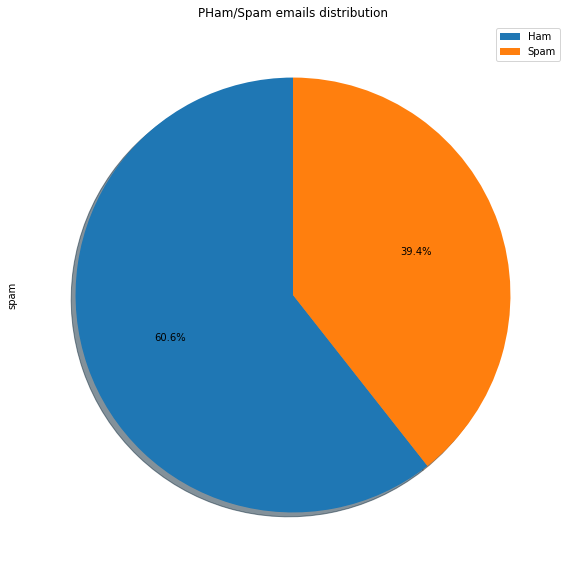

In [16]:
#Pie chart of the above just for a quick proportion view

email.groupby(['spam'])['spam'].count().plot(kind='pie',labels=None, shadow = True,startangle=90,
                                                                      figsize=(15,10), autopct='%1.1f%%')
plt.legend(labels=['Ham','Spam'])
plt.title('PHam/Spam emails distribution')
plt.show()

61% of the data was classified as spam while 39% as Ham

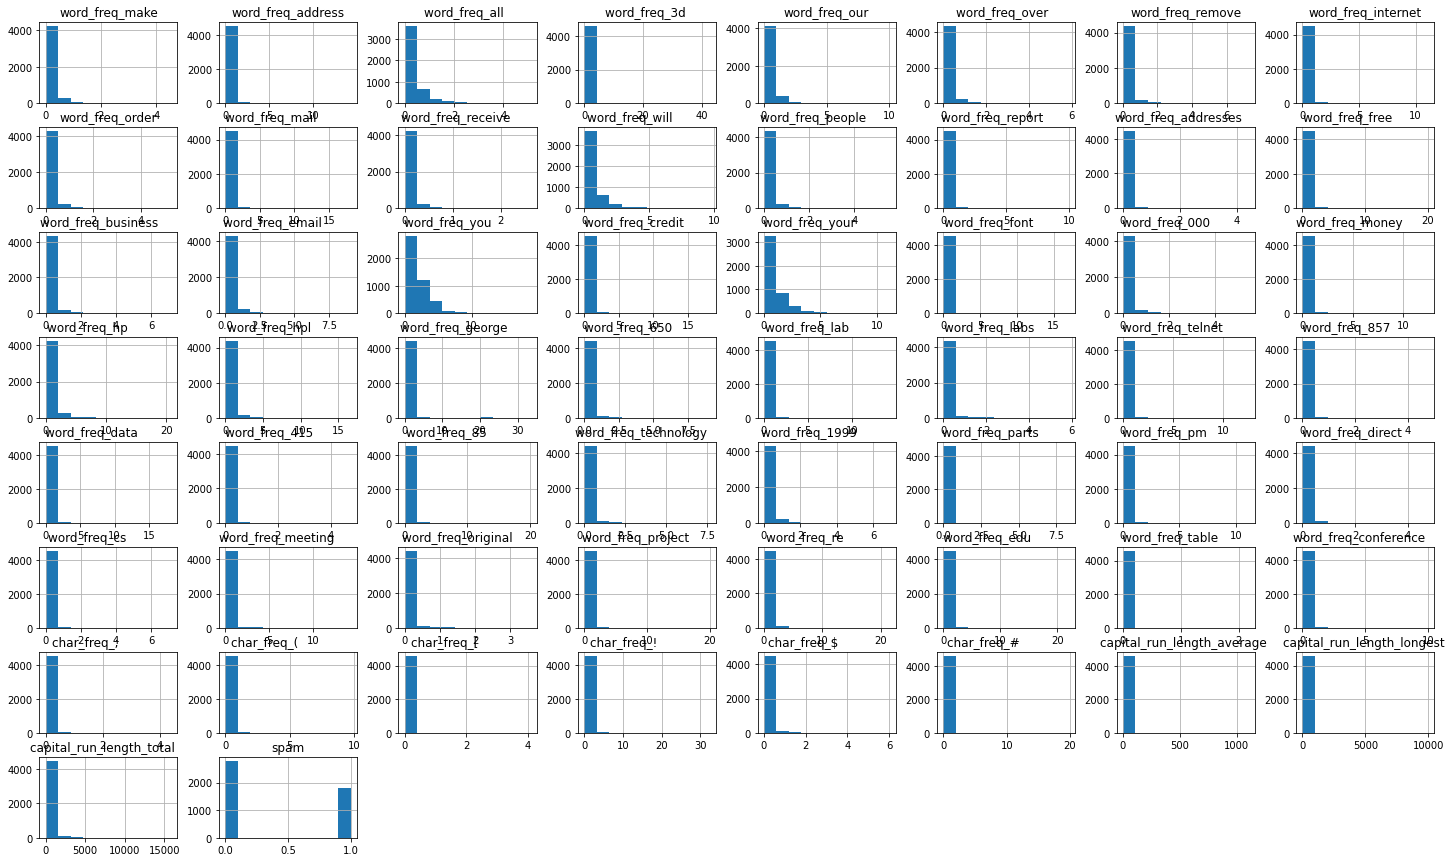

In [17]:
email.hist(bins=10,figsize=(25,15))
plt.show()

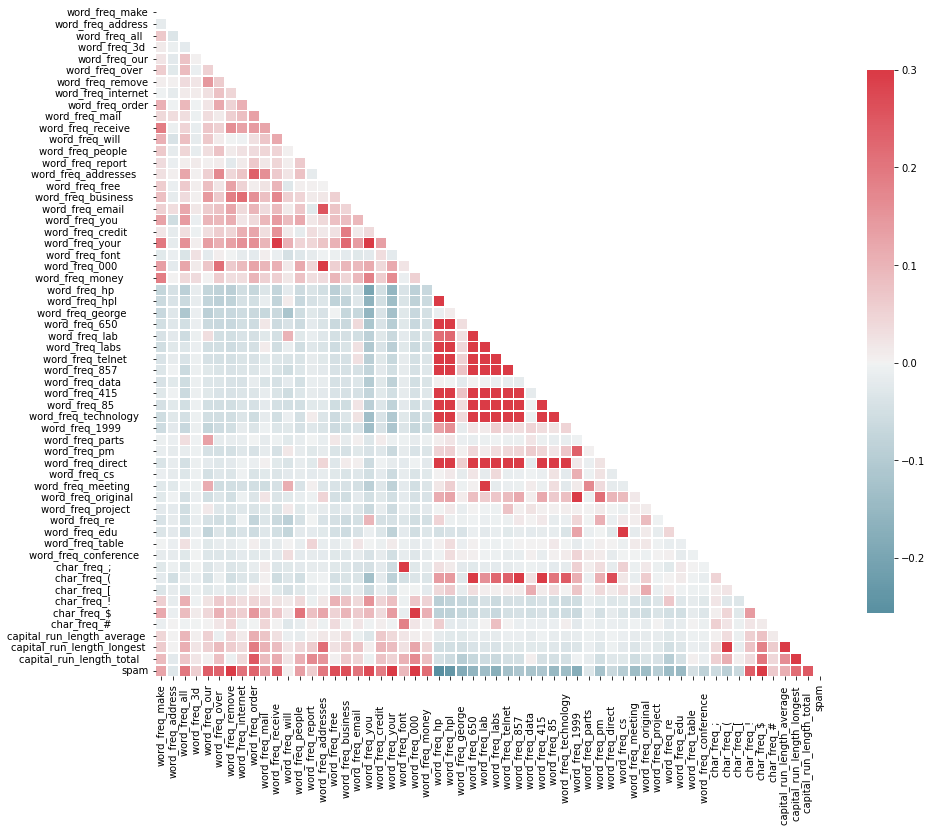

In [18]:
# using the heatmap to check for multicolinearity
# Compute the correlation matrix
corr = email.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Some words like word freq 85 and word freq technology have the highest corelation. 

# **5.0 Feature engeniering**

In [19]:
X = email.drop('spam',axis=1)
y = email['spam']

# **6.0 Implementing the solution**

**6.1 Gaussian Naive Bayes Classifier**

In [22]:
 # Splitting our data into a training set and a test set at 70 - 30
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)

In [24]:
# Training our model
# 
clf = GaussianNB()  
model = clf.fit(X_train, y_train)
# Predicting our test predictors
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

print(confusion_matrix(y_test, predicted))

0.8202898550724638
[[621 224]
 [ 24 511]]




>The model has an ROC Score of 82% with False spam of 224 and false ham of 22. 



**6.2 80-20 split**

In [25]:
 # Splitting our data into a training set and a test set
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)
# Training our model
# 
clf = GaussianNB()  
model = clf.fit(X_train, y_train)
# Predicting our test predictors
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

print(confusion_matrix(y_test, predicted))

0.8206521739130435
[[406 147]
 [ 18 349]]




> This model has a slightly higher score of accuracy (ROC Score) and the number of wrongly classified has reduced.



**6.3 60-40 split**

In [26]:
# Splitting our data into a training set and a test set
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=6)
# Training our model
# 
clf = GaussianNB()  
model = clf.fit(X_train, y_train)
# Predicting our test predictors
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

print(confusion_matrix(y_test, predicted))

0.8239130434782609
[[811 294]
 [ 30 705]]


At this point, I would say the best model is at 80-20 split because the score is slightly lower but the number of wrongly classified is lower compared to other slpits.

**Optimization**

Since our best model is at 80-20 split, Lets optimize it for better scores

In [27]:

#features and label
X = email.iloc[:, :-1].values
y = email.iloc[:, -1].values

#split data with 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

 
#create
clf = GaussianNB()

In [28]:
#define a search space to optimize
from sklearn.model_selection import GridSearchCV


params = {'var_smoothing':[1e-15, 1e-5] }

nb_opt = GridSearchCV(clf, params, n_jobs=-1)
nb_opt = nb_opt.fit(X_train, y_train)

nb_opt.best_params_

{'var_smoothing': 1e-15}

In [30]:

#Lets now classify
X = email.iloc[:, :-1].values
y = email.iloc[:, -1].values

#split data with 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
  
 
#create and fit model
clf = GaussianNB(var_smoothing=1e-15).fit(X_train, y_train)
y_pred = clf.predict(X_test)

#evaluate model
print('Training Accuracy:', accuracy_score(y_train, clf.predict(X_train)))
print('Test Accuracy:', accuracy_score(y_test,y_pred))
print('\n')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Training Accuracy: 0.8171195652173913
Test Accuracy: 0.8293478260869566


Confusion Matrix:
[[391 147]
 [ 10 372]]


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.73      0.83       538
           1       0.72      0.97      0.83       382

    accuracy                           0.83       920
   macro avg       0.85      0.85      0.83       920
weighted avg       0.87      0.83      0.83       920



As we can see, the accuracy has gone to 83% also the wrongly classified has significally dropped.

**Feature reduction**

In [31]:
#Lets do the same with some features reduced

X = email.iloc[:, :-1].values
y = email.iloc[:, -1].values

#split data with 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)


#create and fit model
clf = GaussianNB().fit(X_train, y_train)
y_pred = clf.predict(X_test)

#evaluate model
print('Training Accuracy:', accuracy_score(y_train, clf.predict(X_train)))
print('Test Accuracy:', accuracy_score(y_test,y_pred))
print('\n')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Training Accuracy: 0.8959239130434783
Test Accuracy: 0.9032608695652173


Confusion Matrix:
[[513  25]
 [ 64 318]]


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       538
           1       0.93      0.83      0.88       382

    accuracy                           0.90       920
   macro avg       0.91      0.89      0.90       920
weighted avg       0.90      0.90      0.90       920





> Notice the accuracy of our model is now at 90% which is a very big increase from what we had.



# **8.0 Conclusion**

The model is at its best with 80 - 20 split and with feature reduction performed.